<a href="https://colab.research.google.com/github/plaban1981/Hands-on-Machine-Learning/blob/master/End_To_End_ML_Housing_Price_Prediction_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Download Housing.csv dataset

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/gurupratap-matharu/machine-learning-regression/master/dataset/housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


##Data Description

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


##Summary Statistics

In [4]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


##Data Visualization

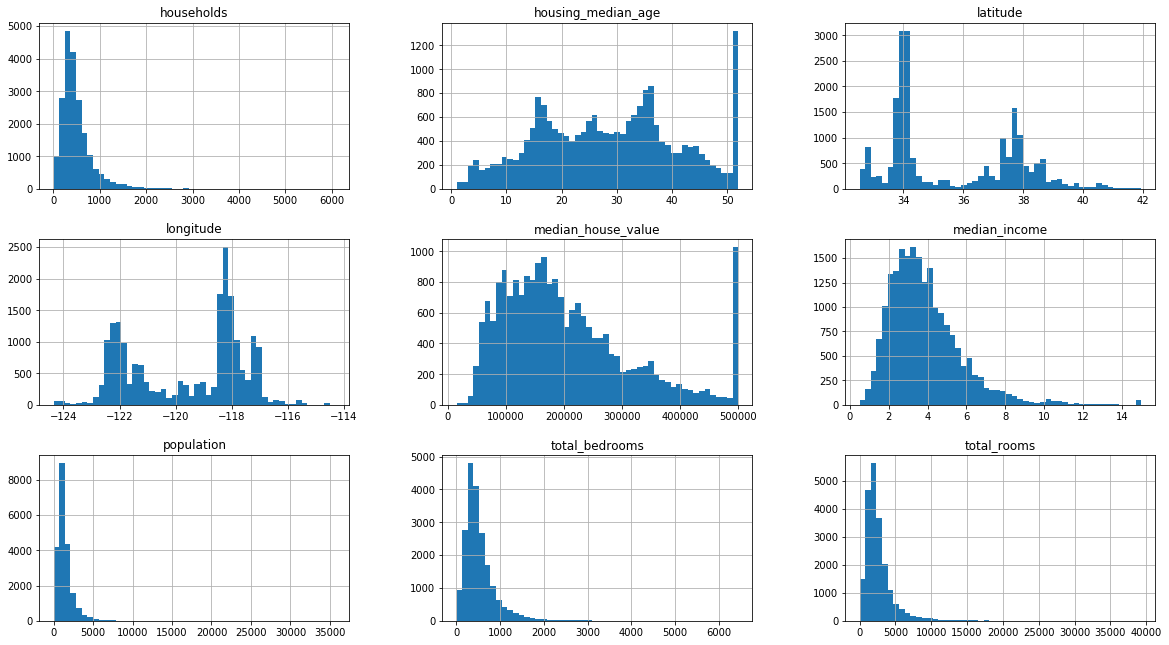

In [0]:
data.hist(bins=50,figsize=(20,11))
plt.show()

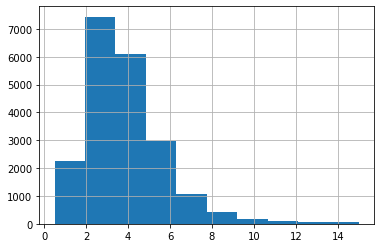

In [5]:
data['median_income'].hist()

##Check For Null Values

In [6]:
data.isnull().sum()[data.isnull().sum() > 0]

total_bedrooms    207
dtype: int64

##Data Preprocessing

In [0]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

numeric_columns = [cols for cols in data.columns if data[cols].dtypes != 'object']
category_columns = data['ocean_proximity']

In [8]:
numeric_columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

## Separating the Label to be predicted

In [0]:
Y = data['median_house_value']
housing_num= data[numeric_columns].drop("median_house_value",axis=1)

In [11]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
num_pipeline.fit(housing_num)

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True))],
         verbose=False)

In [0]:
housing_num_tr = num_pipeline.transform(housing_num)

In [14]:
housing_num_tr.shape

(20640, 8)

##Combine the Pipeline - Numeric + Categorical values preprocessing

###ColumnTransformer  estimator allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms or transformations into a single transformer.

In [86]:
categories = list(data.ocean_proximity.unique())
categories

['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']

In [0]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_attribs),
    ])

housing_data_preprocessed = full_pipeline.fit_transform(data.drop("median_house_value",axis=1))

In [16]:
housing_data_preprocessed[1:]

array([[-1.32284391,  1.04318455, -0.60701891, ...,  0.        ,
         1.        ,  0.        ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  0.        ,
         1.        ,  0.        ],
       [-1.33781784,  1.03850269,  1.85618152, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87362627,  1.77823747, -0.84539315, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.        ,
         0.        ,  0.        ]])

In [17]:
housing_data_preprocessed[1:].shape

(20639, 13)

In [18]:
housing_data_preprocessed.shape

(20640, 13)

## Split the preprocessed features and label to Training and Test set

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(housing_data_preprocessed,Y,test_size=0.15,random_state=1)

##Task 1

**Question:** Try a Support Vector Machine regressor (sklearn.svm.SVR), with various hyperparameters such as kernel="linear" (with various values for the C hyperparameter) or kernel="rbf" (with various values for the C and gamma hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best SVR predictor perform?

In [0]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
svm_reg = SVR()

parameters =  {'kernel': ['linear','rbf'], 
         'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}

random_svr_reg =  RandomizedSearchCV(estimator=svm_reg,param_distributions=parameters,cv=5,scoring='neg_mean_squared_error',n_iter=10,verbose=2,n_jobs=-1)
random_svr_reg.fit(housing_data_preprocessed,Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 11.7min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [10.0, 30.0, 100.0, 300.0, 1000.0,
                                              3000.0, 10000.0, 30000.0],
                                        'gamma': [0.01, 0.03, 0.1, 0.3, 1.0,
                                                  3.0],
                                        'kernel': ['linear', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=2)

#### The best model achieves the following score (evaluated using 5-fold cross validation):

In [0]:
negative_mse = random_svr_reg.best_score_
rmse_score = np.sqrt(-negative_mse)
print('RMSE Score :',rmse_score)

RMSE Score : 65993.69869494159


#### Let's check the best hyperparameters found:

In [0]:
print("Best Hyperparameters retrieved \n",random_svr_reg.best_params_)

Best Hyperparameters retrieved 
 {'kernel': 'rbf', 'gamma': 0.1, 'C': 30000.0}


##Apply the Best Parameters Returned by Randomized Gridearch to predict the housing median price

In [0]:
svr_random = random_svr_reg.best_estimator_
svr_random.fit(X_train,y_train)

SVR(C=30000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred = svr_random.predict(X_test)

##Evaluation Scores of the predictions made by RandomSearchCV parameters

In [0]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print(f'MAE score : {mean_absolute_error(y_test,y_pred)}')
print(f'MSE score : {mean_squared_error(y_test,y_pred)}')
print(f'R2 score : {r2_score(y_test,y_pred)}')

MAE score : 38426.372713661636
MSE score : 3472502411.9172077
R2 score : 0.7398311501974038


##Visualize the Predictions

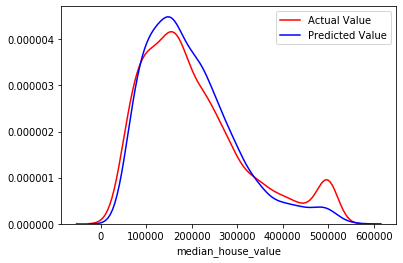

In [0]:
import seaborn as sns
ax = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred,hist=False,color='b',label='Predicted Value')

## Task 2 :

#### Question: Try replacing  RandomizedSearchCV with GridSearchCV.

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
svm_reg = SVR()
parameters =  {'kernel': ['linear','rbf'], 
         'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}

grid_search_reg = GridSearchCV(svm_reg,param_grid = parameters,scoring = 'neg_mean_squared_error',cv=5,verbose=2,n_jobs=-1)
grid_search_reg.fit(housing_data_preprocessed,Y)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 73.9min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 103.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                               10000.0, 30000.0],
                         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=2)

#### The best model achieves the following score (evaluated using 5-fold cross validation):

In [22]:
rmse = np.sqrt(-grid_search_reg.best_score_)
rmse 

65506.05350319281

## The best parameters  determined by the Grid Search

In [23]:
print(f"Best Parameters \n {grid_search_reg.best_params_}")

Best Parameters 
 {'C': 30000.0, 'gamma': 0.3, 'kernel': 'rbf'}


####Notice that the value of C is the maximum tested value. When this happens you definitely want to launch the grid search again with higher values for C (removing the smallest values), because it is likely that higher values of C will be better.

In [24]:
svm_grid = grid_search_reg.best_estimator_
svm_grid.fit(X_train,y_train)

SVR(C=30000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.3,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred = svm_grid.predict(X_test)

##Evaluation of the model predictions on the basis of best hyperparameters returned by GridSearchCV

In [27]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print(f'MAE score : {mean_absolute_error(y_test,y_pred)}')
print(f'MSE score : {mean_squared_error(y_test,y_pred)}')
print(f'RMSE score : {np.sqrt(mean_squared_error(y_test,y_pred))}')
print(f'R2 score : {r2_score(y_test,y_pred)}')

MAE score : 36304.56598709404
MSE score : 3160982810.17486
RMSE score : 56222.61831482824
R2 score : 0.7631710033817021


##Note :
The R squared score is better compared to as per the hyperparameters proposed by RandomSaerchCV

##Visualize the Predictions Vs Actual Values

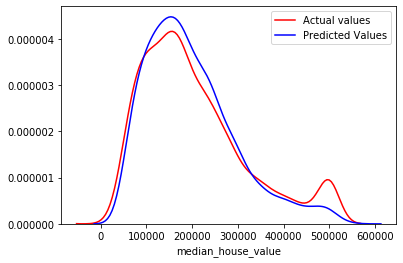

In [28]:
ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual values')
sns.distplot(y_pred,hist= False,color='b',label = 'Predicted Values')

## Task 3. Question: Try adding a transformer in the preparation pipeline to select only the most important attributes.

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
parameters ={ 'max_depth': [10,30,60,90, 100],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [200, 400, 600, 800, 1000]}
random_forest_grid = RandomizedSearchCV(estimator = rf,param_distributions=parameters,cv=5,n_iter=10,verbose=2,n_jobs=4)
random_forest_grid.fit(housing_data_preprocessed,Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 14.9min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed: 18.3min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=N

In [42]:
random_forest_grid.best_params_

{'max_depth': 90, 'max_features': 'sqrt', 'n_estimators': 600}

In [43]:
rf = random_forest_grid.best_estimator_
rf.fit(housing_data_preprocessed,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=90,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [44]:
rf.feature_importances_

array([1.27038540e-01, 1.11941343e-01, 4.89026746e-02, 5.58363900e-02,
       3.93509313e-02, 5.82363484e-02, 3.87811030e-02, 3.54579482e-01,
       2.70848021e-02, 1.16146974e-01, 2.73176390e-04, 8.44947457e-03,
       1.33787606e-02])

In [0]:
from sklearn.base import BaseEstimator,TransformerMixin
def indices_of_top_k(arr,k):
  return np.sort(np.argpartition(np.array(arr),-k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [47]:
k =5
top_k_feature_indices = indices_of_top_k(rf.feature_importances_, k)
top_k_feature_indices


array([0, 1, 5, 7, 9])

In [48]:
attributes = [col for col in data.columns]
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'population', 'median_income',
       'ocean_proximity'], dtype='<U18')

In [51]:
sorted(zip(rf.feature_importances_, np.array(attributes)[top_k_feature_indices]), reverse=True)[:k]

[(0.1270385399053752, 'longitude'),
 (0.11194134274983654, 'latitude'),
 (0.055836389978250044, 'median_income'),
 (0.04890267455824347, 'population'),
 (0.039350931285322584, 'ocean_proximity')]

##Visualize Feature Importance

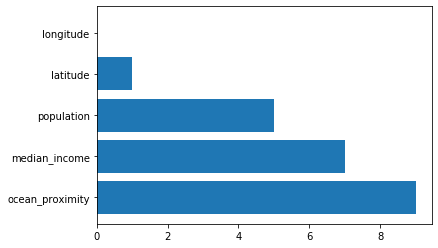

In [52]:
imp,names = zip(*sorted(zip(top_k_feature_indices,np.array(attributes)[top_k_feature_indices]),reverse=True))
plt.barh(range(len(names)), imp, align='center')
plt.yticks(range(len(names)), names)
plt.show()

##create a new pipeline that runs the previously defined preparation pipeline, and adds top k feature selection:

In [0]:
feature_importances = rf.feature_importances_
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [0]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(data.drop('median_house_value',axis=1))

####look at the features of the first 3 instances:

In [56]:
housing_prepared_top_k_features[:3]

array([[-1.32783522,  1.05254828, -0.9744286 ,  2.34476576,  0.        ],
       [-1.32284391,  1.04318455,  0.86143887,  2.33223796,  0.        ],
       [-1.33282653,  1.03850269, -0.82077735,  1.7826994 ,  0.        ]])

####Now let's double check that these are indeed the top k features:

In [62]:
housing_data_preprocessed[0:3,top_k_feature_indices]

array([[-1.32783522,  1.05254828, -0.9744286 ,  2.34476576,  0.        ],
       [-1.32284391,  1.04318455,  0.86143887,  2.33223796,  0.        ],
       [-1.33282653,  1.03850269, -0.82077735,  1.7826994 ,  0.        ]])

## 4.Question: Try creating a single pipeline that does the full data preparation plus the final prediction.

In [0]:
prepare_select_and_predict_pipeline = Pipeline([
                                                ('preparation',full_pipeline),
                                                ('feature_selection',TopFeatureSelector(feature_importances, k)),
                                                ('svm_regressor', grid_search_reg.best_estimator_)
])

In [93]:
prepare_select_and_predict_pipeline.fit(data.drop('median_house_value',axis=1),data['median_house_value'])

Pipeline(memory=None,
         steps=[('preparation',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                              

#### Test Full Pipeline on few instances

In [94]:
X = data.drop('median_house_value',axis=1)
Y = data['median_house_value']
X_test_instance = X.iloc[:4]
Y_test_instance = Y.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(X_test_instance))
print("Labels:\t\t", list(Y_test_instance))

Predictions:	 [446570.10067623 433732.89639438 396393.5606144  294096.3453017 ]
Labels:		 [452600.0, 358500.0, 352100.0, 341300.0]


## Pipeline for Random Forest Regressor

In [0]:
prepare_select_and_predict_pipeline_rf = Pipeline([
                                                ('preparation',full_pipeline),
                                                ('feature_selection',TopFeatureSelector(feature_importances, k)),
                                                ('Randomregressor', random_forest_grid.best_estimator_)
])

In [76]:
prepare_select_and_predict_pipeline_rf.fit(data.drop('median_house_value',axis=1),data['median_house_value'])

Pipeline(memory=None,
         steps=[('preparation',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                              

##Test Full Pipeline on few instances

In [78]:
print("Predictions:\t", prepare_select_and_predict_pipeline_rf.predict(X_test_instance))
print("Labels:\t\t", list(Y_test_instance))

Predictions:	 [432438.23       386249.86833333 375648.86666667 347162.50833333]
Labels:		 [452600.0, 358500.0, 352100.0, 341300.0]


####Note:
Well, the full pipeline seems to work fine. Of course, the predictions are not fantastic for SVR but  they are  better if we used the best RandomForestRegressor .

##5.Question: Automatically explore some Pipeline preparation options using GridSearchCV.

In [83]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [97]:
len(feature_importances)

13

In [99]:
data.shape

(20640, 10)

In [100]:
housing_data_preprocessed.shape

(20640, 13)

In [0]:
param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

In [104]:
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [106]:
grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(data[num_attribs + cat_attribs],data['median_house_value'])

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] preparation__num__imputer__strategy=mean ........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... preparation__num__imputer__strategy=mean, total=  17.9s
[CV] preparation__num__imputer__strategy=mean ........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.9s remaining:    0.0s


[CV] ......... preparation__num__imputer__strategy=mean, total=  17.8s
[CV] preparation__num__imputer__strategy=mean ........................
[CV] ......... preparation__num__imputer__strategy=mean, total=  17.4s
[CV] preparation__num__imputer__strategy=mean ........................
[CV] ......... preparation__num__imputer__strategy=mean, total=  17.3s
[CV] preparation__num__imputer__strategy=mean ........................
[CV] ......... preparation__num__imputer__strategy=mean, total=  17.2s
[CV] preparation__num__imputer__strategy=median ......................
[CV] ....... preparation__num__imputer__strategy=median, total=  17.1s
[CV] preparation__num__imputer__strategy=median ......................
[CV] ....... preparation__num__imputer__strategy=median, total=  17.3s
[CV] preparation__num__imputer__strategy=median ......................
[CV] ....... preparation__num__imputer__strategy=median, total=  17.1s
[CV] preparation__num__imputer__strategy=median ......................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  4.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preparation',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                     

In [107]:
grid_search_prep.best_params_

{'preparation__num__imputer__strategy': 'mean'}